# Importing Libraries

In [409]:
# Importing required libraries

import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import chi2
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from scipy.stats import norm

In [410]:
# Uploading the data

uploaded = files.upload()
df=pd.read_csv('online_shoppers_intention.csv')

Saving online_shoppers_intention.csv to online_shoppers_intention (9).csv


# Preprocessing

In [411]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [412]:
# Getting rid of duplicates

df=df.drop_duplicates()

In [413]:
# Encoding categorical variables to nominal values.

d={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Month'] = df['Month'].map(d)

booleanmap = {True: 1, False : 0}
df['Weekend'] = df['Weekend'].map(booleanmap)

nominal = {'Returning_Visitor':1,'New_Visitor':2,'Other':3}
df['VisitorType']=df['VisitorType'].map(nominal)
df['Revenue']=df['Revenue'].map(booleanmap)
df['Revenue']

<ipython-input-413-0400f3551fb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].map(d)
<ipython-input-413-0400f3551fb0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekend'] = df['Weekend'].map(booleanmap)
<ipython-input-413-0400f3551fb0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12205, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


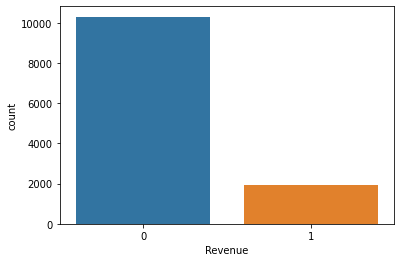

In [414]:
# Checking the target variable

sns.countplot(df['Revenue'])

In [415]:
# Converting datatype to Integer

df['SpecialDay']= df['SpecialDay'].astype(int)
df['Month']= df['Month'].astype(int)
df['OperatingSystems']= df['OperatingSystems'].astype(int)
df['Browser']= df['Browser'].astype(int)
df['Region']= df['Region'].astype(int)
df['TrafficType']= df['TrafficType'].astype(int)
df['VisitorType']= df['VisitorType'].astype(int)
df['Weekend']= df['Weekend'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

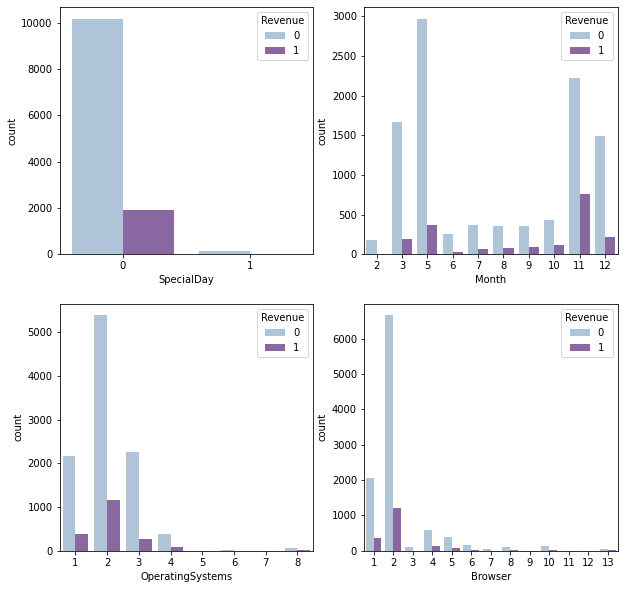

In [416]:
# Countplot for categorical variables

categorical_df1 = df[['SpecialDay','Month','OperatingSystems','Browser']]
fig , ax = plt.subplots(2,2,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (categorical_df1, ax.flatten()):  
  sns.countplot(categorical_df1[i],hue = df['Revenue'],ax = subplots, palette = 'BuPu')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

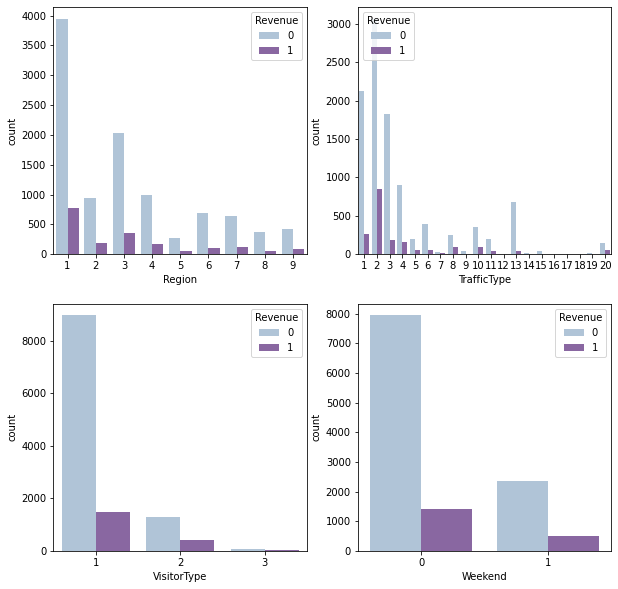

In [417]:
categorical_df2 = df[['Region','TrafficType','VisitorType','Weekend']]
fig , ax = plt.subplots(2,2,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (categorical_df2, ax.flatten()):  
  sns.countplot(categorical_df2[i],hue = df['Revenue'],ax = subplots, palette = 'BuPu')
plt.show()

In [418]:
#Subsetting categorical data 

categorical_df = df.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues'] , axis =1)
X = categorical_df.drop('Revenue',axis=1)
y = categorical_df['Revenue']

(array([  9.75316352, 291.73000913,   1.05265451,   8.75709727,
         3.61670149,   1.5251652 ,  14.50562989,   7.18597857]), array([1.79014386e-03, 2.08740531e-65, 3.04896519e-01, 3.08399512e-03,
       5.72021805e-02, 2.16839515e-01, 1.39741291e-04, 7.34754692e-03]))


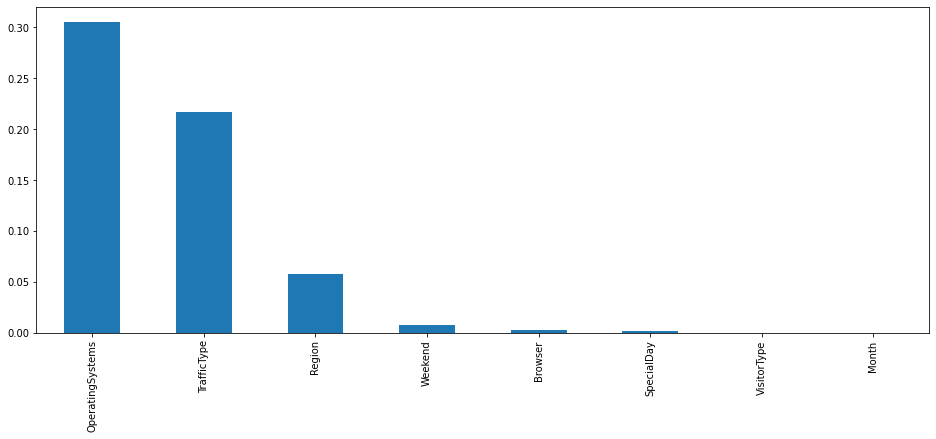

In [419]:
#Running a Chi squared test for checking dependancy of categorical data

chi_scores = chi2(X,y)
print(chi_scores)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(16,6))
p_values.plot.bar()

In [420]:
# Dropping insignificant categories

df.drop(['OperatingSystems','TrafficType'],axis=1,inplace=True)

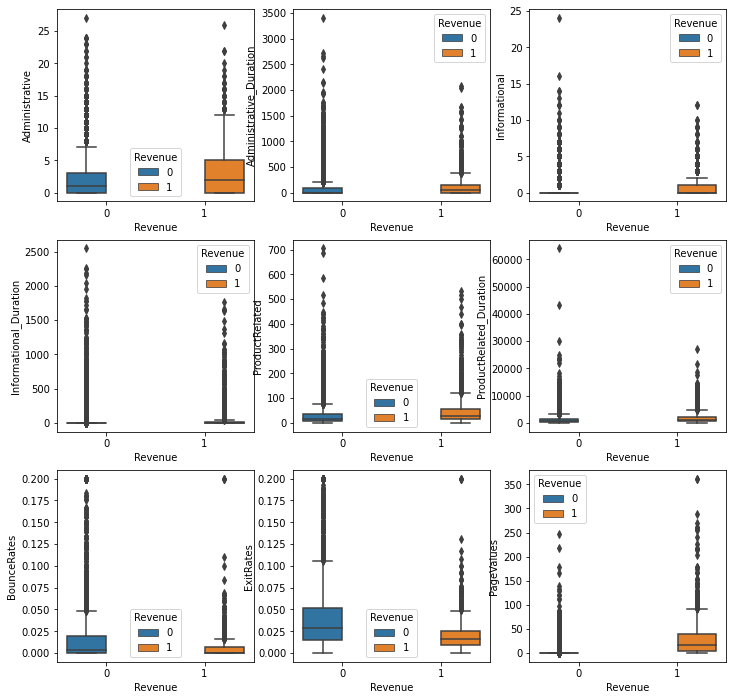

In [421]:
# Looking at numerical distributions

fig , ax = plt.subplots(3,3,figsize = (12,12))
#sns.set(rc={"figure.figsize":(60,30)})
sns.boxplot(y='Administrative',x='Revenue', hue='Revenue', data=df ,ax=ax[0,0])
sns.boxplot(y='Administrative_Duration',x='Revenue',hue='Revenue', data=df , ax=ax[0,1])
sns.boxplot(y='Informational',x='Revenue',hue='Revenue', data=df , ax=ax[0,2])
sns.boxplot(y='Informational_Duration',x='Revenue',hue='Revenue', data=df , ax=ax[1,0])
sns.boxplot(y='ProductRelated',x='Revenue',hue='Revenue', data=df , ax=ax[1,1])
sns.boxplot(y='ProductRelated_Duration',x='Revenue', hue='Revenue', data=df , ax=ax[1,2])
sns.boxplot(y='BounceRates',x='Revenue',hue='Revenue', data=df , ax=ax[2,0])
sns.boxplot(y='ExitRates',x='Revenue',hue='Revenue', data=df , ax=ax[2,1])
sns.boxplot(y='PageValues',x='Revenue',hue='Revenue', data=df , ax=ax[2,2])

plt.show()

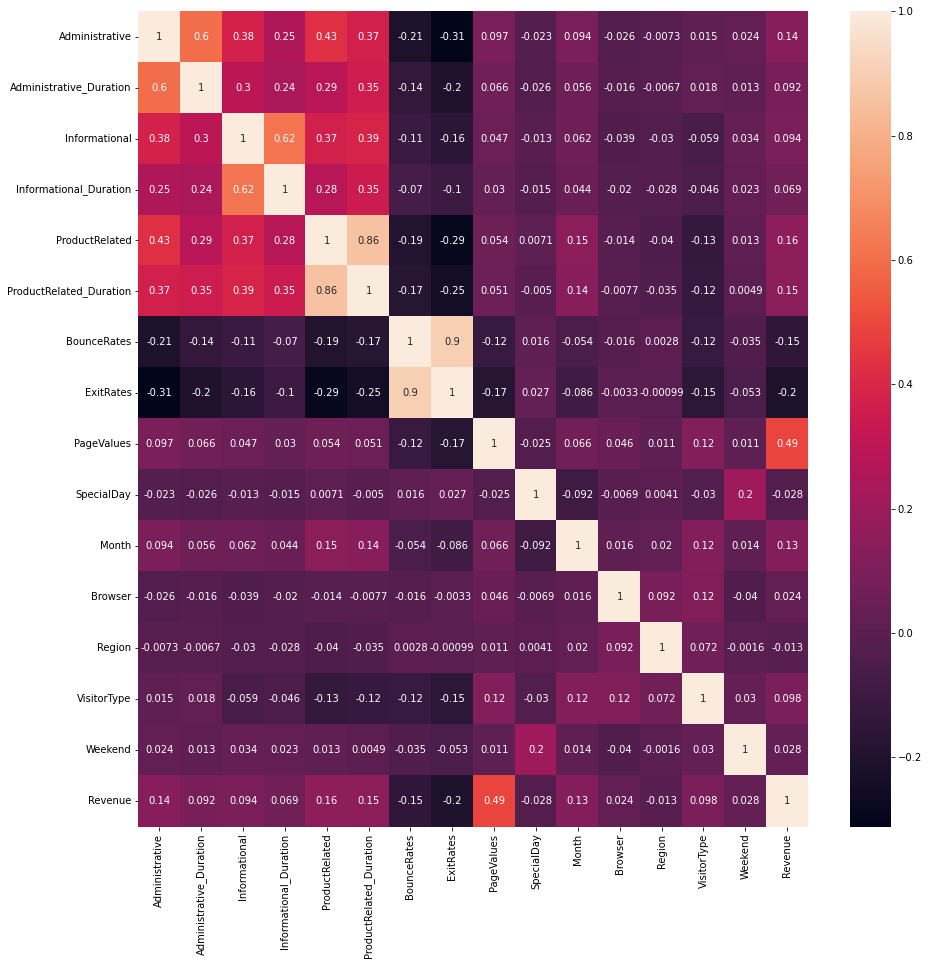

In [422]:
# Using heatmap to account for correlated features

figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

In [423]:
# Checking for skewed data

df.skew()

Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 8.734116
Month                     -0.062340
Browser                    3.217404
Region                     0.978480
VisitorType                2.303936
Weekend                    1.255097
Revenue                    1.892862
dtype: float64

In [424]:
# Square root transformation for high skew since we have 0 inflated data, log transformation is powerless

df['Administrative'] = np.sqrt(df['Administrative'])
df['ProductRelated'] = np.sqrt(df['ProductRelated'])
df['BounceRates'] = np.sqrt(df['BounceRates']  )
df['PageValues'] = np.sqrt(df['PageValues']  )
df['Informational'] = np.sqrt(df['Informational']  )
df['Administrative_Duration'] = np.sqrt(df['Administrative_Duration']  )
df['Informational_Duration'] = np.sqrt(df['Informational_Duration']  )
df['ProductRelated_Duration'] = np.sqrt(df['ProductRelated_Duration']  )
df['ExitRates'] = np.sqrt(df['ExitRates']  )

In [425]:
# Checking the results

df.skew()

Administrative             0.625303
Administrative_Duration    1.527806
Informational              1.933381
Informational_Duration     3.419129
ProductRelated             1.503354
ProductRelated_Duration    1.412977
BounceRates                1.715256
ExitRates                  1.211128
PageValues                 2.515993
SpecialDay                 8.734116
Month                     -0.062340
Browser                    3.217404
Region                     0.978480
VisitorType                2.303936
Weekend                    1.255097
Revenue                    1.892862
dtype: float64

In [426]:
# Mapping categories back

browsermap = {1:'B1',2:'B2',3:'B3',4:'B4',5:'B5',6:'B6',7:'B7',8:'B8',9:'B9',10:'B10',11:'B11',12:'B12',13:'B13'}
regionmap = {1:'R1',2:'R2',3:'R3',4:'R4',5:'R5',6:'R6',7:'R7',8:'R8',9:'R9'}
visitormap = {1:'Returning_Visitor',2:'New_Visitor',3:'Other'}
monthmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df['Browser'] = df['Browser'].map(browsermap)
df['Region'] = df['Region'].map(regionmap)
df['VisitorType'] = df['VisitorType'].map(visitormap)
df['Month'] = df['Month'].map(monthmap)

In [427]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Browser,Region,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.447214,0.447214,0.0,0,Feb,B1,R1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,1.414214,8.000000,0.000000,0.316228,0.0,0,Feb,B2,R1,Returning_Visitor,0,0
2,0.0,0.0,0.0,0.0,1.000000,0.000000,0.447214,0.447214,0.0,0,Feb,B1,R9,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,1.414214,1.632993,0.223607,0.374166,0.0,0,Feb,B2,R2,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,3.162278,25.049950,0.141421,0.223607,0.0,0,Feb,B3,R1,Returning_Visitor,1,0


In [428]:
# Checking for nulls

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
Browser                    0
Region                     0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [429]:
# One Hot Encoding

browserd = pd.get_dummies(df['Browser'])
regiond = pd.get_dummies(df['Region'])
visitord = pd.get_dummies(df['VisitorType'])
monthd = pd.get_dummies(df['Month'])
df = pd.concat([df,browserd,regiond,visitord,monthd],axis=1)
df.drop(['Browser','Region','VisitorType','Month'],axis=1,inplace=True)

In [430]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.447214,0.447214,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,1.414214,8.000000,0.000000,0.316228,0.0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.000000,0.000000,0.447214,0.447214,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,1.414214,1.632993,0.223607,0.374166,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,3.162278,25.049950,0.141421,0.223607,0.0,0,...,0,0,1,0,0,0,0,0,0,0


In [431]:
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'B1', 'B10', 'B11', 'B12', 'B13', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B9', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8',
       'R9', 'New_Visitor', 'Other', 'Returning_Visitor', 'Aug', 'Dec', 'Feb',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')


In [432]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int64
Weekend                      int64
Revenue                      int64
B1                           uint8
B10                          uint8
B11                          uint8
B12                          uint8
B13                          uint8
B2                           uint8
B3                           uint8
B4                           uint8
B5                           uint8
B6                           uint8
B7                           uint8
B8                           uint8
B9                           uint8
R1                           uint8
R2                           uint8
R3                           uint8
R4                  

In [433]:
# Dropping target variable and highly correlated features

X=df.drop(['Revenue','Administrative_Duration','Informational_Duration','ProductRelated_Duration','ExitRates',],axis=1)

y=df['Revenue']

In [434]:
# Splitting the data

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.25,random_state=101)

In [435]:
# Implementing SMOTE for sampling heavily imbalanced data

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
train_X,train_y = smote.fit_resample(train_X,train_y)

In [436]:
# Standardizing testing data with mean and standard deviation of training data

trainmean = train_X.mean()
trainstd = train_X.std()

stdtrainx = (train_X-trainmean)/trainstd
stdtrainx
stdtestx = (test_X-trainmean)/trainstd
stdtestx

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,B1,B10,B11,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
10469,0.919696,-0.549209,-0.556386,-0.716189,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,2.881733,-0.093726,-0.155061,-0.121629,-0.355566,-0.529826,-0.636221,-0.191967,-0.163783
1980,-1.082798,-0.549209,-1.154545,-0.716189,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,-0.155061,-0.121629,2.812238,-0.529826,-0.636221,-0.191967,-0.163783
154,-1.082798,-0.549209,-0.749723,-0.716189,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,10.668753,-0.155061,-0.121629,-0.355566,-0.529826,-0.636221,-0.191967,-0.163783
10972,-0.187256,-0.549209,1.371420,-0.716189,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,-0.155061,-0.121629,-0.355566,-0.529826,1.571680,-0.191967,-0.163783
4923,0.183690,-0.549209,1.201178,-0.716189,1.019580,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,-0.155061,-0.121629,-0.355566,1.887291,-0.636221,-0.191967,-0.163783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,1.286585,-0.549209,-0.430449,0.329565,1.206754,-0.088322,-0.489134,2.227552,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,-0.155061,-0.121629,-0.355566,-0.529826,-0.636221,-0.191967,6.105255
8039,-1.082798,-0.549209,0.208099,-0.716189,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,-0.155061,-0.121629,-0.355566,-0.529826,1.571680,-0.191967,-0.163783
6090,0.919696,-0.549209,-0.862825,-0.716189,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,6.448661,-0.121629,-0.355566,-0.529826,-0.636221,-0.191967,-0.163783
2035,-1.082798,-0.549209,-0.143428,0.238450,-0.758357,-0.088322,-0.489134,-0.448894,-0.091959,-0.013912,...,-0.156365,-0.346991,-0.093726,-0.155061,-0.121629,2.812238,-0.529826,-0.636221,-0.191967,-0.163783


# Logistic Regression

In [437]:
#Logistic Regression

class LogisticRegression:
  def __init__(self, learningRate, tolerance, maxiterations)-> None:
    self.learningRate=learningRate
    self.tolerance=tolerance
    self.maxiterations=maxiterations

  def sigmoid(self, z):
    sig= 1/(1+ np.exp(-z))
    return sig

  def costFunction(self, X, y):
    sig= self.sigmoid(X.dot(self.w))
    cost= (y* np.log(sig)+(1-y)*np.log(1-sig)).sum()
    cost=-cost/X.shape[0]
    return cost

  def gradient(self,X,y):
    sig= self.sigmoid(X.dot(self.w))
    gradient= (sig - y).dot(X)
    return gradient

  def gradientDescent(self, X, y):
    errors=[]
    last_error= float('inf')
    iterations=[]
    for i in tqdm(range(self.maxiterations)):
      self.w=self.w- self.learningRate*self.gradient(X,y)
      current_error= self.costFunction(X,y)
      diff= last_error-current_error
      last_error=current_error
      errors.append(current_error)
      iterations.append(i)
      if np.abs(diff)< self.tolerance:
        print (" the model stopped learning")
        break
    print(iterations)
    print(errors)
    plt.plot(iterations,errors)
    return

  def predict_train(self, X,y):
    sig= self.sigmoid(X.dot(self.w))
    value=[0.1,0.2,0.4,0.6,0.8,0.95]
    cutoff=[]
    sensitivity=[]
    accuracy=[]
    for i in value:
      vector = np.vectorize( lambda x: 1 if x > i else 0)
      y_hat =vector(sig)
      cm=confusion_matrix(y,y_hat)
      print(cm)
      y= (y==1)  
      y_hat=(y_hat==1)
      cutoff.append(i)
      sensitivity.append((y & y_hat).sum()/ y.sum())
      accuracy.append((( y== y_hat).sum())/y.shape[0])
      
    
    parameters = pd.DataFrame(list(zip(cutoff, sensitivity, accuracy)),
               columns =['Cutoff', 'Sensitivity','Accuracy'])
    print(parameters)
  

  def fit(self,X_train, y_train):
    self.X_train=X_train
    self.y_train=y_train
    print("Solving using Gradient Descent")
    self.w= np.ones(self.X_train.shape[1], dtype= np.float64) * 0
    self.gradientDescent(self.X_train, self.y_train)

  def predict_test(self,X, y):
    sig= self.sigmoid(X.dot(self.w))
    vfunc = np.vectorize(lambda t: 1 if t > 0.4 else 0)
    y_hat =vfunc(sig)
    cm=confusion_matrix(y, y_hat)
    print(cm)
    y= (y==1) 
    y_hat=(y_hat==1)
    sensitivity=((y & y_hat).sum()/ y.sum())
    accuracy=((( y== y_hat).sum())/y.shape[0])
    

    print("The test accuracy score of the model is {}".format(accuracy))
    print("The test sensitivity score of the model is {}".format(sensitivity))

Solving using Gradient Descent


  8%|▊         | 424/5000 [00:02<00:31, 146.53it/s]


 the model stopped learning
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

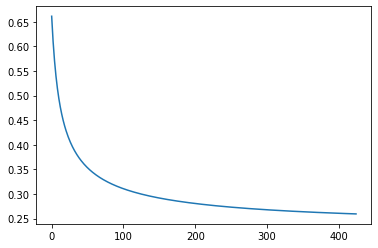

In [438]:
# Logistic Regression with specified parameters

lr=LogisticRegression(0.00001,0.00005,5000)
lr.fit(stdtrainx, train_y)

In [439]:
# Checking for optimal cutoff on training data

lr.predict_train(stdtrainx, train_y)

[[5055 2696]
 [  81 7670]]
[[6152 1599]
 [ 256 7495]]
[[7091  660]
 [ 790 6961]]
[[7434  317]
 [1572 6179]]
[[7584  167]
 [2682 5069]]
[[7702   49]
 [4746 3005]]
   Cutoff  Sensitivity  Accuracy
0    0.10     0.989550  0.820862
1    0.20     0.966972  0.880338
2    0.40     0.898078  0.906464
3    0.60     0.797187  0.878145
4    0.80     0.653980  0.816217
5    0.95     0.387692  0.690685


In [440]:
# Predicting testing data with optimal cutoff

lr.predict_test(stdtestx,test_y)

[[2338  208]
 [ 169  337]]
The test accuracy score of the model is 0.8764744429882044
The test sensitivity score of the model is 0.66600790513834


# Gaussian Naive Bayes

In [441]:
# Naive Bayes

class NaiveBayes:
    
    def __init__(self, X_train, y_train):
        self.X_train=X_train
        self.y_train=y_train
  
    def fitDistribution(self, data):
        distribution=[]
        for i in range(data.shape[1]):
          mu= np.mean(data)     
          sigma= np.std(data)    
          distribution.append( norm(mu, sigma)  ) 
        print(distribution)   
        return distribution
       
    def probability(self, X, prior, distribution): 
        probabilities=[]  
        for i in range (X.shape[0]):   
          probabilities.append(distribution[i].pdf(X[i]))
        l=np.prod(probabilities)
        return l
    
    
    def runModel(self):
        
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
                
        self.prior_y0 = len(self.X0_train)/len(self.X_train)
        self.prior_y1 = len(self.X1_train)/len(self.X_train)

        self.dist_y0 = self.fitDistribution(self.X0_train)
        self.dist_y1 = self.fitDistribution(self.X1_train)
               
    def predict(self,X,y):
        y_hat=[]
        for sample, target in zip(X, y):
            py0 = self.probability(sample, self.prior_y0, self.dist_y0)
            py1 = self.probability(sample, self.prior_y1, self.dist_y1 )
            y_hat.append(np.argmax([py0*100,  py1*100]))
        parameters = pd.DataFrame(list(zip(y, y_hat)),columns =['Actual', 'Predicted'])
        cm = confusion_matrix(y, y_hat)
        print(cm)
        
        sensitivity=((y & y_hat).sum()/ y.sum())
        accuracy=((( y== y_hat).sum())/y.shape[0])  
        print((y & y_hat).sum())
        print('Sensitivity:',sensitivity ,"/n", 'Accuracy:', accuracy) 
        print(parameters)

In [442]:
# Training model on standardized data

gnb=NaiveBayes(stdtrainx.values,train_y.values)

In [443]:
gnb.runModel()

[<scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64b021c6a0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64aff4a760>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64aa017700>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64a9da5a90>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64b01cb6a0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64aa017160>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64b0091f70>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64afed5cd0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64aff58df0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64afed5be0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64afff1ac0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64afff14f0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64afff1be0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f64b0

In [444]:
# Confusion matrix of training data

gnb.predict(stdtrainx.values,train_y.values)

[[3324 4427]
 [1213 6538]]
6538
Sensitivity: 0.843504063991743 /n Accuracy: 0.6361759772932525
       Actual  Predicted
0           0          1
1           0          1
2           1          0
3           0          1
4           0          1
...       ...        ...
15497       1          1
15498       1          1
15499       1          1
15500       1          1
15501       1          1

[15502 rows x 2 columns]


In [445]:
# Confusion Matrix of testing data

gnb.predict(stdtestx.values,test_y)

[[1086 1460]
 [ 229  277]]
277
Sensitivity: 0.5474308300395256 /n Accuracy: 0.44659239842726084
      Actual  Predicted
0          0          1
1          0          1
2          0          0
3          1          1
4          0          1
...      ...        ...
3047       0          0
3048       0          0
3049       0          0
3050       0          1
3051       0          0

[3052 rows x 2 columns]


# Neural Network

In [446]:
# Neural Network

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

# 3 layered sequential model with relu and sigmoid activation 

model = Sequential()
model.add(Dense(16, input_dim= 42,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [447]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(stdtrainx, train_y, epochs=100, batch_size=64)

Epoch 1/100
243/243 [==============================] - 1s 2ms/step - loss: 0.5203 - accuracy: 0.7498
Epoch 2/100
243/243 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.8941
Epoch 3/100
243/243 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9107
Epoch 4/100
243/243 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9156
Epoch 5/100
243/243 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9189
Epoch 6/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9208
Epoch 7/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9218
Epoch 8/100
243/243 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9232
Epoch 9/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9236
Epoch 10/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1845 - accura

In [448]:
# Checking for different cutoff values

cutoff=[0.1,0.2,0.4, 0.6, 0.8, 0.95]
sensitivity=[]
accuracy=[]
for i in cutoff:
  y_hat= (model.predict(stdtrainx) > i).astype(int)
  y_hat=np.squeeze(y_hat,1)
  sensitivity.append((train_y & y_hat).sum()/train_y.sum())
  accuracy.append(((train_y== y_hat).sum())/train_y.shape[0])

parameters = pd.DataFrame(list(zip(cutoff, sensitivity, accuracy)),
            columns =['cutoff', 'sensitivity','accuracy'])
print(parameters.head(6))

485/485 [==============================] - 0s 916us/step
   cutoff  sensitivity  accuracy
0    0.10     0.989808  0.877435
1    0.20     0.977680  0.912076
2    0.40     0.951232  0.936911
3    0.60     0.915237  0.935686
4    0.80     0.846600  0.914850
5    0.95     0.737324  0.867243


In [449]:
# Predictions on test data using optimal cutoff value

y_pred= (model.predict(stdtestx)>0.4).astype(int)
y_pred=np.squeeze(y_pred,1)
cm=confusion_matrix(test_y, y_pred)
print(cm)
print('sensitivity:', ((test_y & y_pred).sum()/test_y.sum()), 'accuracy:',
  (test_y== y_pred).sum()/test_y.shape[0])

96/96 [==============================] - 0s 975us/step
[[2302  244]
 [ 146  360]]
sensitivity: 0.7114624505928854 accuracy: 0.8722149410222805


In [450]:
# Tracking validation accuracy and training accuracy

hist = model.fit(stdtrainx, train_y,validation_data=(stdtestx,test_y), validation_split=0.25,  epochs=100, batch_size=64)

Epoch 1/100
243/243 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9370 - val_loss: 0.3539 - val_accuracy: 0.8830
Epoch 2/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9365 - val_loss: 0.3657 - val_accuracy: 0.8739
Epoch 3/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9371 - val_loss: 0.3559 - val_accuracy: 0.8853
Epoch 4/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9370 - val_loss: 0.3641 - val_accuracy: 0.8775
Epoch 5/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1514 - accuracy: 0.9367 - val_loss: 0.3562 - val_accuracy: 0.8853
Epoch 6/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9372 - val_loss: 0.3628 - val_accuracy: 0.8801
Epoch 7/100
243/243 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9375 - val_loss: 0.3528 - val_accuracy: 0.8853

[]

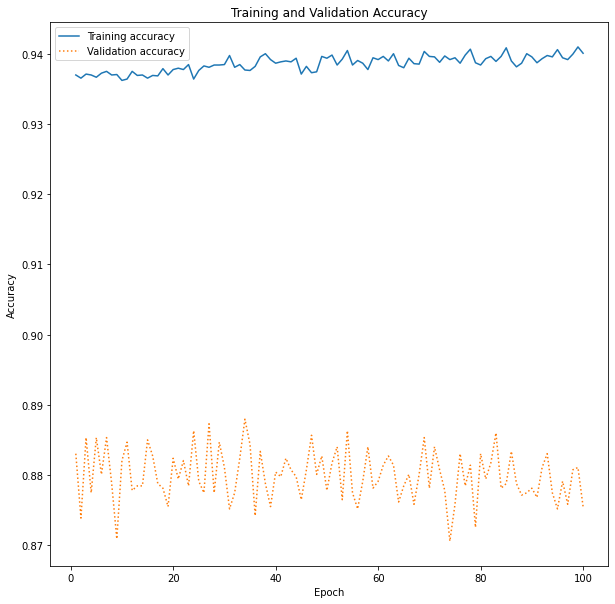

In [451]:
# Plotting validation accuracy vs training accuracy

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
figure(figsize=(10,10))
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()